In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, statsmodels.formula.api as smf
from scipy import stats

income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Initial Data Exploration

### Question 1

In [ ]:
income94.dtypes # Checking data types of columns

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
gross_income_group    object
dtype: object

### Question 2

In [ ]:
income94.eq(" ?").sum() # Finding the missing values represented as " ?"

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

In [ ]:
income94 = income94.replace(' ?', np.nan) # Replacing the missing values with NaN
income94.isna().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

### Question 3

Below are the plots of the distributions of capital_gain and capital_loss.

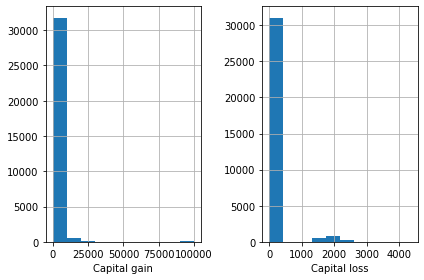

In [ ]:
plt.subplot(1,2,1) # Plotting capital_gain and capital_loss
income94["capital_gain"].hist()
plt.xlabel("Capital gain")
plt.subplot(1,2,2)
income94["capital_loss"].hist()
plt.xlabel("Capital loss")
plt.tight_layout()

In [ ]:
income94["capital_gain_categorical"] = np.where(income94["capital_gain"] == 0, "zero", "non-zero") # Creating a new categorical variable which is "zero" if capital_gain = 0, "non-zero" otherwise
income94["capital_loss_categorical"] = np.where(income94["capital_loss"] == 0, "zero", "non-zero")

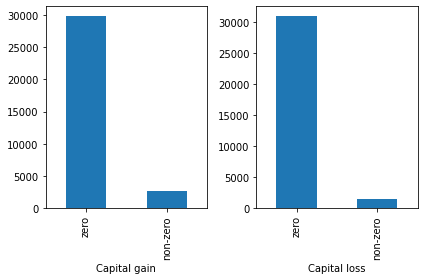

In [ ]:
plt.subplot(1,2,1) # Plotting this new categorical variable
income94["capital_gain_categorical"].value_counts().plot(kind='bar')
plt.xlabel("Capital gain")
plt.subplot(1,2,2)
income94["capital_loss_categorical"].value_counts().plot(kind='bar')
plt.xlabel("Capital loss")
plt.tight_layout()

### Question 4

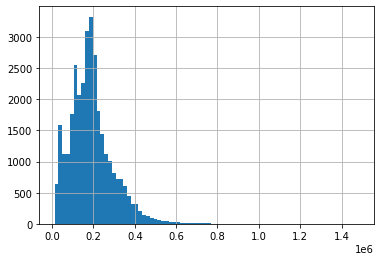

In [ ]:
income94['fnlwgt'].hist(bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5876884c0>,
      dtype=object)

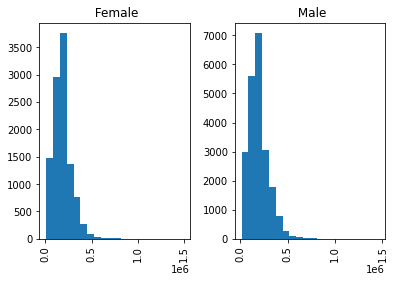

In [ ]:
income94['fnlwgt'].hist(by=income94['sex'], bins=20) # Plotting fnlwgt for males and females separately

# Correlation

### a)

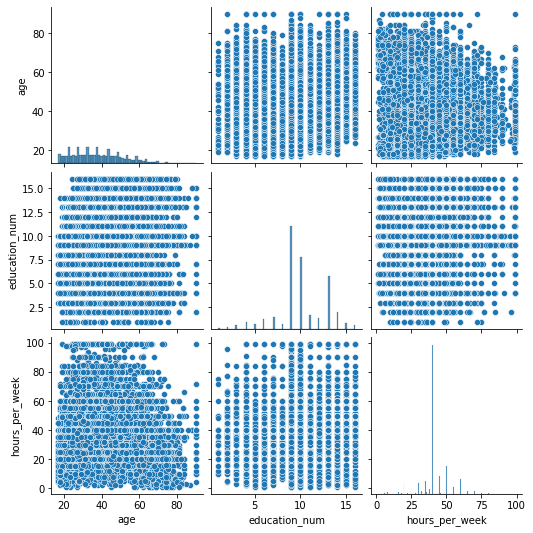

In [ ]:
sns.pairplot(income94[['age', 'education_num', 'hours_per_week']]) # Creating the correlation plots for the three variables
plt.show()

### b)

In [ ]:
corrMat = income94.corr() # Creating the correlation matrix
corrMat

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
stat1, p1 = stats.pearsonr(income94["capital_gain"], income94["education_num"]) # Using the Pearson's r method to determine the correlation coefficient between "capital_gain" and "education"num" and p-value of this correlation
stat2, p2 = stats.pearsonr(income94["hours_per_week"], income94["education_num"]) # Same as above, but with "hours_per_week" and "education_num"
print('stat=%.6f, p=%.3f' % (stat1, p1))
print('stat=%.6f, p=%.3f' % (stat2, p2))

stat=0.122630, p=0.000
stat=0.148123, p=0.000


### c)

In [ ]:
statm, pm = stats.pearsonr(income94.loc[income94['sex'] == ' Male']['age'], income94.loc[income94['sex'] == ' Male']['education_num']) # Using the Pearson's r method (as above) for "capital_gain" and "education"num" for males
print('stat=%.6f, p=%.3f' % (statm, pm))
statf, pf = stats.pearsonr(income94.loc[income94['sex'] == ' Female']['age'], income94.loc[income94['sex'] == ' Female']['education_num']) # Same as above, but with females
print('stat=%.6f, p=%.3f' % (statf, pf))

stat=0.060486, p=0.000
stat=-0.017899, p=0.063


### d)

In [ ]:
edu_hours = income94[["education_num", "hours_per_week"]] # Creating a subset of the dataframe by selecting the columns "education_num", "hours_per_week"
edu_hours.cov() # Creating the covariance matrix for the two variables

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


# Regression

### a)

In [ ]:
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit() # Fitting the linear regression model with 'hours_per_week' as the dependent variable and 'sex' as the independent variable
print(reg1.summary())
print(reg1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:08:16   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

### b)

In [ ]:
reg2 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit() # Fitting the linear regression model as in 1a) with 'education_num' as the control variable
print(reg2.summary())
print(reg2.mse_resid)

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:08:12   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

### c)

In [ ]:
reg3 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit() # Adding gross_income_group as a binary variable to the model with 'sex' only
print(reg3.summary())
print(reg3.mse_resid)

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:19:02   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Part III

In [ ]:
# Creating a list with the occupation categories
lst = [' Tech-support', ' Sales', ' Exec-managerial', ' Adm-clerical']

# Selecting the data which have values 'tech-support', 'sales', 'exec-managerial', or 'adm-clerical' for the column 'occupation'
part3data = income94[income94['occupation'].isin(lst)]

Text(0, 0.5, 'Capital gains')

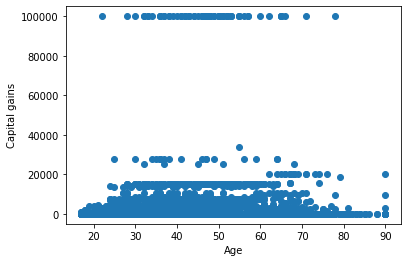

In [ ]:
# Note: these plots are not included in the report since they are mainly used to find potential outliers

# Plotting the scatterplot between capital_gain and age
plt.scatter(x='age', y='capital_gain', data=part3data)
plt.xlabel('Age')
plt.ylabel('Capital gains')

Text(0, 0.5, 'Capital gains')

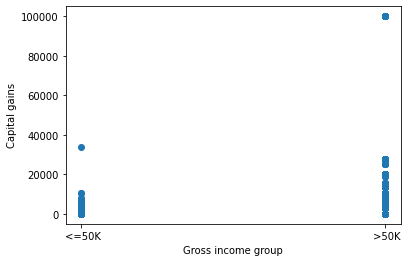

In [ ]:
# Plotting the scatterplot between capital_gain and gross_income_group
plt.scatter(x='gross_income_group', y='capital_gain', data=part3data)
plt.xlabel('Gross income group')
plt.ylabel('Capital gains')

In [ ]:
part3data[part3data['capital_gain'] == 99999].describe() # Summary of the individuals with capital gains of 99,999 USD

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,74.000000,74.000000,74.000000,74.0,74.0,74.000000
mean,47.418919,187433.662162,12.418919,99999.0,0.0,49.229730
std,10.268994,93779.130459,2.113277,0.0,0.0,12.309421
min,22.000000,25468.000000,9.000000,99999.0,0.0,20.000000
25%,41.250000,118728.250000,10.000000,99999.0,0.0,40.000000
50%,47.000000,172082.000000,13.000000,99999.0,0.0,50.000000
75%,52.000000,216036.750000,14.000000,99999.0,0.0,55.000000
max,78.000000,553405.000000,16.000000,99999.0,0.0,80.000000


Text(0, 0.5, 'Capital gains')

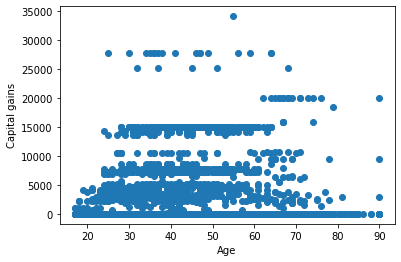

In [ ]:
# Removing the 74 individuals with capital gains of 99,999 USD from the data
part3data1 = part3data[part3data['capital_gain'] < 99999]

# Plotting the scatterplot between capital_gain and age again
plt.scatter(x='age', y='capital_gain', data=part3data1)
plt.xlabel('Age')
plt.ylabel('Capital gains')

In [ ]:
# Creating the multiple linear regression model with features 'age' and 'gross_income_group' and response 'capital_gain' for the selected data
part3reg = smf.ols('capital_gain ~ age + gross_income_group', data=part3data1).fit()

# Printing the regression information summary
print(part3reg.summary())

# Printing the RMSE of the regression
print(part3reg.mse_resid)

                            OLS Regression Results                            
Dep. Variable:           capital_gain   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     688.0
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          5.41e-284
Time:                        12:11:29   Log-Likelihood:            -1.1516e+05
No. Observations:               12340   AIC:                         2.303e+05
Df Residuals:                   12337   BIC:                         2.304e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         